## Create Organized CSV of the results
In this section I will create organied csv of the results.
- Organized by the day shooting of each of the flower
- Version without the shooting from days 2 and 8 (results werent good)

In [6]:
etay_shooting_days = ['day_1_2024_12_05', 'day_3_2024_12_12', 'day_4_2024_12_17', 'day_8_2025_01_09', 'day_9_2025_01_16']
uriel_shooting_days = ['day_2_2024_12_09', 'day_5_2024_12_24', 'day_6_2024_12_30', 'day_7_2025_01_06']

In [2]:
import pandas as pd

flowers_df = pd.read_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn_with_yolo/csv_results/collected_class_distribution_per_folder.csv')
images_df = pd.read_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn_with_yolo/csv_results/collected_class_distribution_per_image.csv')   

In [3]:
flowers_df.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15          209          1501   
1  day_1_2024_12_05  greenhouse      14          305          1333   
2  day_1_2024_12_05  greenhouse      13          141          2257   
3  day_1_2024_12_05  greenhouse      12          273          1665   
4  day_1_2024_12_05  greenhouse      11          380          1034   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  
0           16            0.1211             0.8696            0.0093  
1            7            0.1854             0.8103            0.0043  
2           34            0.0580             0.9280            0.0140  
3            8            0.1403             0.8556            0.0041  
4           15            0.2659             0.7236            0.0105

In [3]:
images_df.head()

day    location  number     image  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15  IMG_0577            2            26   
1  day_1_2024_12_05  greenhouse      15  IMG_0578            1           112   
2  day_1_2024_12_05  greenhouse      15  IMG_0579            0             2   
3  day_1_2024_12_05  greenhouse      15  IMG_0580            3            21   
4  day_1_2024_12_05  greenhouse      15  IMG_0581            2            60   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  
0            0            0.0714             0.9286            0.0000  
1            2            0.0087             0.9739            0.0174  
2            0            0.0000             1.0000            0.0000  
3            0            0.1250             0.8750            0.0000  
4            0            0.0323             0.9677            0.0000

### Plants types for each of the planets ids

In [19]:
plants_type_csv = "/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_2/plants_types_experiment2.csv"

df_plants_type = pd.read_csv(plants_type_csv)
df_plants_type   

date   id HPLC_number repeat_number
0    5.12.24    1        54-1         616-1
1    5.12.24    2        54-2         616-2
2    5.12.24    3        54-3      805-12-3
3    5.12.24    4        54-4         616-5
4    5.12.24    5        54-5      1416-3-6
..       ...  ...         ...           ...
145  16.1.25  146      54-146      1416-3-3
146  16.1.25  147      54-147         616-4
147  16.1.25  148      54-148      805-12-4
148  16.1.25  149      54-149         616-6
149  16.1.25  150      54-150      805-12-6

[150 rows x 4 columns]

In [20]:
flowers_df = flowers_df.merge(
    df_plants_type[['id', 'repeat_number']].rename(columns={'repeat_number': 'plant_type'}), 
    left_on='flower_id', 
    right_on='id', 
    how='left'
).drop(columns=['id'])


In [27]:
flowers_df.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15          209          1501   
1  day_1_2024_12_05  greenhouse      14          305          1333   
2  day_1_2024_12_05  greenhouse      13          141          2257   
3  day_1_2024_12_05  greenhouse      12          273          1665   
4  day_1_2024_12_05  greenhouse      11          380          1034   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0           16            0.1211             0.8696            0.0093   
1            7            0.1854             0.8103            0.0043   
2           34            0.0580             0.9280            0.0140   
3            8            0.1403             0.8556            0.0041   
4           15            0.2659             0.7236            0.0105   

   day_number  flower_id plant_type  
0           1         15      616-8  
1           1         14   1416-3-7  
2           1         13   805-12-6  
3           1         12      616-6  
4           1         11   1416-3-5

### Assign photographer

In [21]:
# Define the mapping of shooting days
etay_shooting_days = ['day_1_2024_12_05', 'day_3_2024_12_12', 'day_4_2024_12_17', 'day_8_2025_01_09', 'day_9_2025_01_16']
uriel_shooting_days = ['day_2_2024_12_09', 'day_5_2024_12_24', 'day_6_2024_12_30', 'day_7_2025_01_06']

# Create a mapping function
def assign_photographer(day):
    if day in etay_shooting_days:
        return "Etay"
    elif day in uriel_shooting_days:
        return "Uriel"
    else:
        return "Unknown"  # If the day is not mapped, mark as "Unknown"

# Apply the function to create the 'photographer' column
flowers_df['photographer'] = flowers_df['day'].apply(assign_photographer)

In [28]:
# get the plant type of flower number 7 in days 8 and 9
flowers_df[(flowers_df['flower_id'] == 7) & (flowers_df['day'].isin(['day_8_2025_01_09', 'day_9_2025_01_16']))]

day    location  number  clear_count  cloudy_count  \
185  day_8_2025_01_09  greenhouse     112          761          4254   
200  day_8_2025_01_09         lab     112          988          2043   
215  day_9_2025_01_16  greenhouse     142         2048          3318   
230  day_9_2025_01_16         lab     142         1560          1453   

     amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
185         1258            0.1213             0.6781            0.2005   
200          619            0.2707             0.5597            0.1696   
215          372            0.3569             0.5783            0.0648   
230          129            0.4965             0.4624            0.0411   

    photographer  day_number  flower_id plant_type  
185         Etay           8          7   805-12-1  
200         Etay           8          7   805-12-1  
215         Etay           9          7   805-12-1  
230         Etay           9          7   805-12-1

In [29]:
# check if the flower_id is the same to each plant_type across the days
flowers_df.groupby('flower_id')['plant_type'].nunique()

flower_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: plant_type, dtype: int64

In [22]:
df = flowers_df

# Extract the day number and reassign flower indices correctly
df['day_number'] = df['day'].apply(lambda x: int(x.split('_')[1]))
df['flower_id'] = (df['number'] - 1) % 15 + 1

# Sort the data by flower_id and then by day_number
df_sorted = df.sort_values(by=['flower_id', 'day_number'])

# Process the images DataFrame to calculate the number of images per flower per day for greenhouse
images_df['day_number'] = images_df['day'].apply(lambda x: int(x.split('_')[1]))
images_df['flower_id'] = (images_df['number'] - 1) % 15 + 1

greenhouse_images_df = images_df[images_df['location'] == 'greenhouse']
lab_images_df = images_df[images_df['location'] == 'lab']

num_images_per_flower_day_greenhouse = greenhouse_images_df.groupby(['day_number', 'flower_id']).size().reset_index(name='num_images')
num_images_per_flower_day_lab = lab_images_df.groupby(['day_number', 'flower_id']).size().reset_index(name='num_images')



In [23]:
images_df.head()

day    location  number     image  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15  IMG_0577            2            26   
1  day_1_2024_12_05  greenhouse      15  IMG_0578            1           112   
2  day_1_2024_12_05  greenhouse      15  IMG_0579            0             2   
3  day_1_2024_12_05  greenhouse      15  IMG_0580            3            21   
4  day_1_2024_12_05  greenhouse      15  IMG_0581            2            60   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0            0            0.0714             0.9286            0.0000   
1            2            0.0087             0.9739            0.0174   
2            0            0.0000             1.0000            0.0000   
3            0            0.1250             0.8750            0.0000   
4            0            0.0323             0.9677            0.0000   

   day_number  flower_id  
0           1         15  
1           1         15  
2           1         15  
3           1         15  
4           1         15

In [24]:
# Sort the data by location, flower_id, and day_number
df_sorted_by_location = df.sort_values(by=['location', 'flower_id', 'day_number'])

df_greenhouse = df_sorted_by_location[df_sorted_by_location['location'] == 'greenhouse']
df_lab = df_sorted_by_location[df_sorted_by_location['location'] == 'lab']

# Merge the number of images with the greenhouse and lab data
df_greenhouse = df_greenhouse.merge(num_images_per_flower_day_greenhouse, on=['day_number', 'flower_id'], how='left')
df_lab = df_lab.merge(num_images_per_flower_day_lab, on=['day_number', 'flower_id'], how='left')


In [25]:
df_greenhouse.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse       1          112           832   
1  day_3_2024_12_12  greenhouse      31         1279          2118   
2  day_4_2024_12_17  greenhouse      46         1229          1972   
3  day_5_2024_12_24  greenhouse      61          327           871   
4  day_6_2024_12_30  greenhouse      76          113           584   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0            4            0.1181             0.8776            0.0042   
1           16            0.3747             0.6206            0.0047   
2          184            0.3631             0.5826            0.0544   
3           21            0.2683             0.7145            0.0172   
4           11            0.1596             0.8249            0.0155   

  photographer  day_number  flower_id plant_type  num_images  
0         Etay           1          1      616-1          17  
1         Etay           3          1      616-1          27  
2         Etay           4          1      616-1          24  
3        Uriel           5          1      616-1          28  
4        Uriel           6          1      616-1          26

In [26]:
df_lab.head()

day location  number  clear_count  cloudy_count  amber_count  \
0  day_1_2024_12_05      lab       1          313           987           10   
1  day_2_2024_12_09      lab      16          310           424           24   
2  day_3_2024_12_12      lab      31         1055           600           11   
3  day_4_2024_12_17      lab      46         2069          1663           52   
4  day_5_2024_12_24      lab      61          623          1126           12   

   clear_normalized  cloudy_normalized  amber_normalized photographer  \
0            0.2389             0.7534            0.0076         Etay   
1            0.4090             0.5594            0.0317        Uriel   
2            0.6333             0.3601            0.0066         Etay   
3            0.5468             0.4395            0.0137         Etay   
4            0.3538             0.6394            0.0068        Uriel   

   day_number  flower_id plant_type  num_images  
0           1          1      616-1          20  
1           2          1      616-1          12  
2           3          1      616-1          23  
3           4          1      616-1          22  
4           5          1      616-1          24

In [9]:
# # save dfs to csv
# df_sorted.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted.csv', index=False)
# df_lab.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted_lab.csv', index=False)
# df_greenhouse.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted_greenhouse.csv', index=False)

In [ ]:
# save csv
# df_sorted_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_sorted.csv', index=False)
# df_greenhouse_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_greenhouse_sorted.csv', index=False)
# df_lab_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_lab_sorted.csv', index=False)

## Analysis of the Results
In this section I will analysis the results received.
- I want to check how many flowers are change their trichome dist from clear to cloudy and then amber.
- How many did not changed their dist accordingly
- How many In the end have high percentage of amber and not cloudy or clear
- Try to segments the different flowers and see if they have the same characteristics (same trichome proportions)


In [13]:
df_greenhouse.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse       1          112           832   
1  day_3_2024_12_12  greenhouse      31         1279          2118   
2  day_4_2024_12_17  greenhouse      46         1229          1972   
3  day_5_2024_12_24  greenhouse      61          327           871   
4  day_6_2024_12_30  greenhouse      76          113           584   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0            4            0.1181             0.8776            0.0042   
1           16            0.3747             0.6206            0.0047   
2          184            0.3631             0.5826            0.0544   
3           21            0.2683             0.7145            0.0172   
4           11            0.1596             0.8249            0.0155   

   day_number  flower_id  num_images  
0           1          1          17  
1           3          1          27  
2           4          1          24  
3           5          1          28  
4           6          1          26

In [14]:
df_lab.head()

day location  number  clear_count  cloudy_count  amber_count  \
0  day_1_2024_12_05      lab       1          313           987           10   
1  day_2_2024_12_09      lab      16          310           424           24   
2  day_3_2024_12_12      lab      31         1055           600           11   
3  day_4_2024_12_17      lab      46         2069          1663           52   
4  day_5_2024_12_24      lab      61          623          1126           12   

   clear_normalized  cloudy_normalized  amber_normalized  day_number  \
0            0.2389             0.7534            0.0076           1   
1            0.4090             0.5594            0.0317           2   
2            0.6333             0.3601            0.0066           3   
3            0.5468             0.4395            0.0137           4   
4            0.3538             0.6394            0.0068           5   

   flower_id  num_images  
0          1          20  
1          1          12  
2          1          23  
3          1          22  
4          1          24

To analyze how many flowers change their trichome distribution from clear to cloudy and then to amber, we can follow these steps:

 **Identify the trend for each flower**: For each flower, check the trend in trichome counts over the days.

### Step-by-Step Approach

1. **Calculate the Trends**: For each flower, calculate the proportion of trichomes that are clear, cloudy, and amber for each day.
2. **Identify Changes**: Check how the proportions change over time for each flower.


In [32]:
import matplotlib.pyplot as plt

def plot_normalized_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(20, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_normalized'].values
        cloudy_trend = flower_data['cloudy_normalized'].values
        amber_trend = flower_data['amber_normalized'].values
        num_images = flower_data['num_images'].values

        ax = axes[idx * 2]
        ax.plot(days, clear_trend, label='Clear', color='blue')
        ax.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax.plot(days, amber_trend, label='Amber', color='red')

        for i in range(len(days)):
            ax.annotate(f'{clear_trend[i]:.2f}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax.annotate(f'{cloudy_trend[i]:.2f}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax.annotate(f'{amber_trend[i]:.2f}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

        ax.set_ylabel(f'Flower {flower_id}')
        ax.legend()

        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax.set_xticks(days)
        ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def plot_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(20, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_count'].values
        cloudy_trend = flower_data['cloudy_count'].values
        amber_trend = flower_data['amber_count'].values
        num_images = flower_data['num_images'].values

        ax = axes[idx * 2]
        ax.plot(days, clear_trend, label='Clear', color='blue')
        ax.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax.plot(days, amber_trend, label='Amber', color='red')

        for i in range(len(days)):
            ax.annotate(f'{clear_trend[i]}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax.annotate(f'{cloudy_trend[i]}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax.annotate(f'{amber_trend[i]}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

        ax.set_ylabel(f'Flower {flower_id}')
        ax.legend()

        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax.set_xticks(days)
        ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    

def plot_combined_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(30, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_normalized'].values
        cloudy_trend = flower_data['cloudy_normalized'].values
        amber_trend = flower_data['amber_normalized'].values
        clear_count = flower_data['clear_count'].values
        cloudy_count = flower_data['cloudy_count'].values
        amber_count = flower_data['amber_count'].values
        num_images = flower_data['num_images'].values

        ax_norm = axes[idx * 2]
        ax_norm.plot(days, clear_trend, label='Clear', color='blue')
        ax_norm.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax_norm.plot(days, amber_trend, label='Amber', color='red')
        for i in range(len(days)):
            ax_norm.annotate(f'{clear_trend[i]:.2f}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax_norm.annotate(f'{cloudy_trend[i]:.2f}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax_norm.annotate(f'{amber_trend[i]:.2f}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
        ax_norm.set_ylabel(f'Flower {flower_id} (Normalized)')
        ax_norm.legend()
        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax_norm.set_xticks(days)
        ax_norm.set_xticklabels(xticks_labels, rotation=45, ha='right')

        ax_count = axes[idx * 2 + 1]
        ax_count.plot(days, clear_count, label='Clear', color='blue')
        ax_count.plot(days, cloudy_count, label='Cloudy', color='green')
        ax_count.plot(days, amber_count, label='Amber', color='red')
        for i in range(len(days)):
            ax_count.annotate(f'{clear_count[i]}', (days[i], clear_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax_count.annotate(f'{cloudy_count[i]}', (days[i], cloudy_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax_count.annotate(f'{amber_count[i]}', (days[i], amber_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
        ax_count.set_ylabel(f'Flower {flower_id} (Count)')
        ax_count.legend()
        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax_count.set_xticks(days)
        ax_count.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


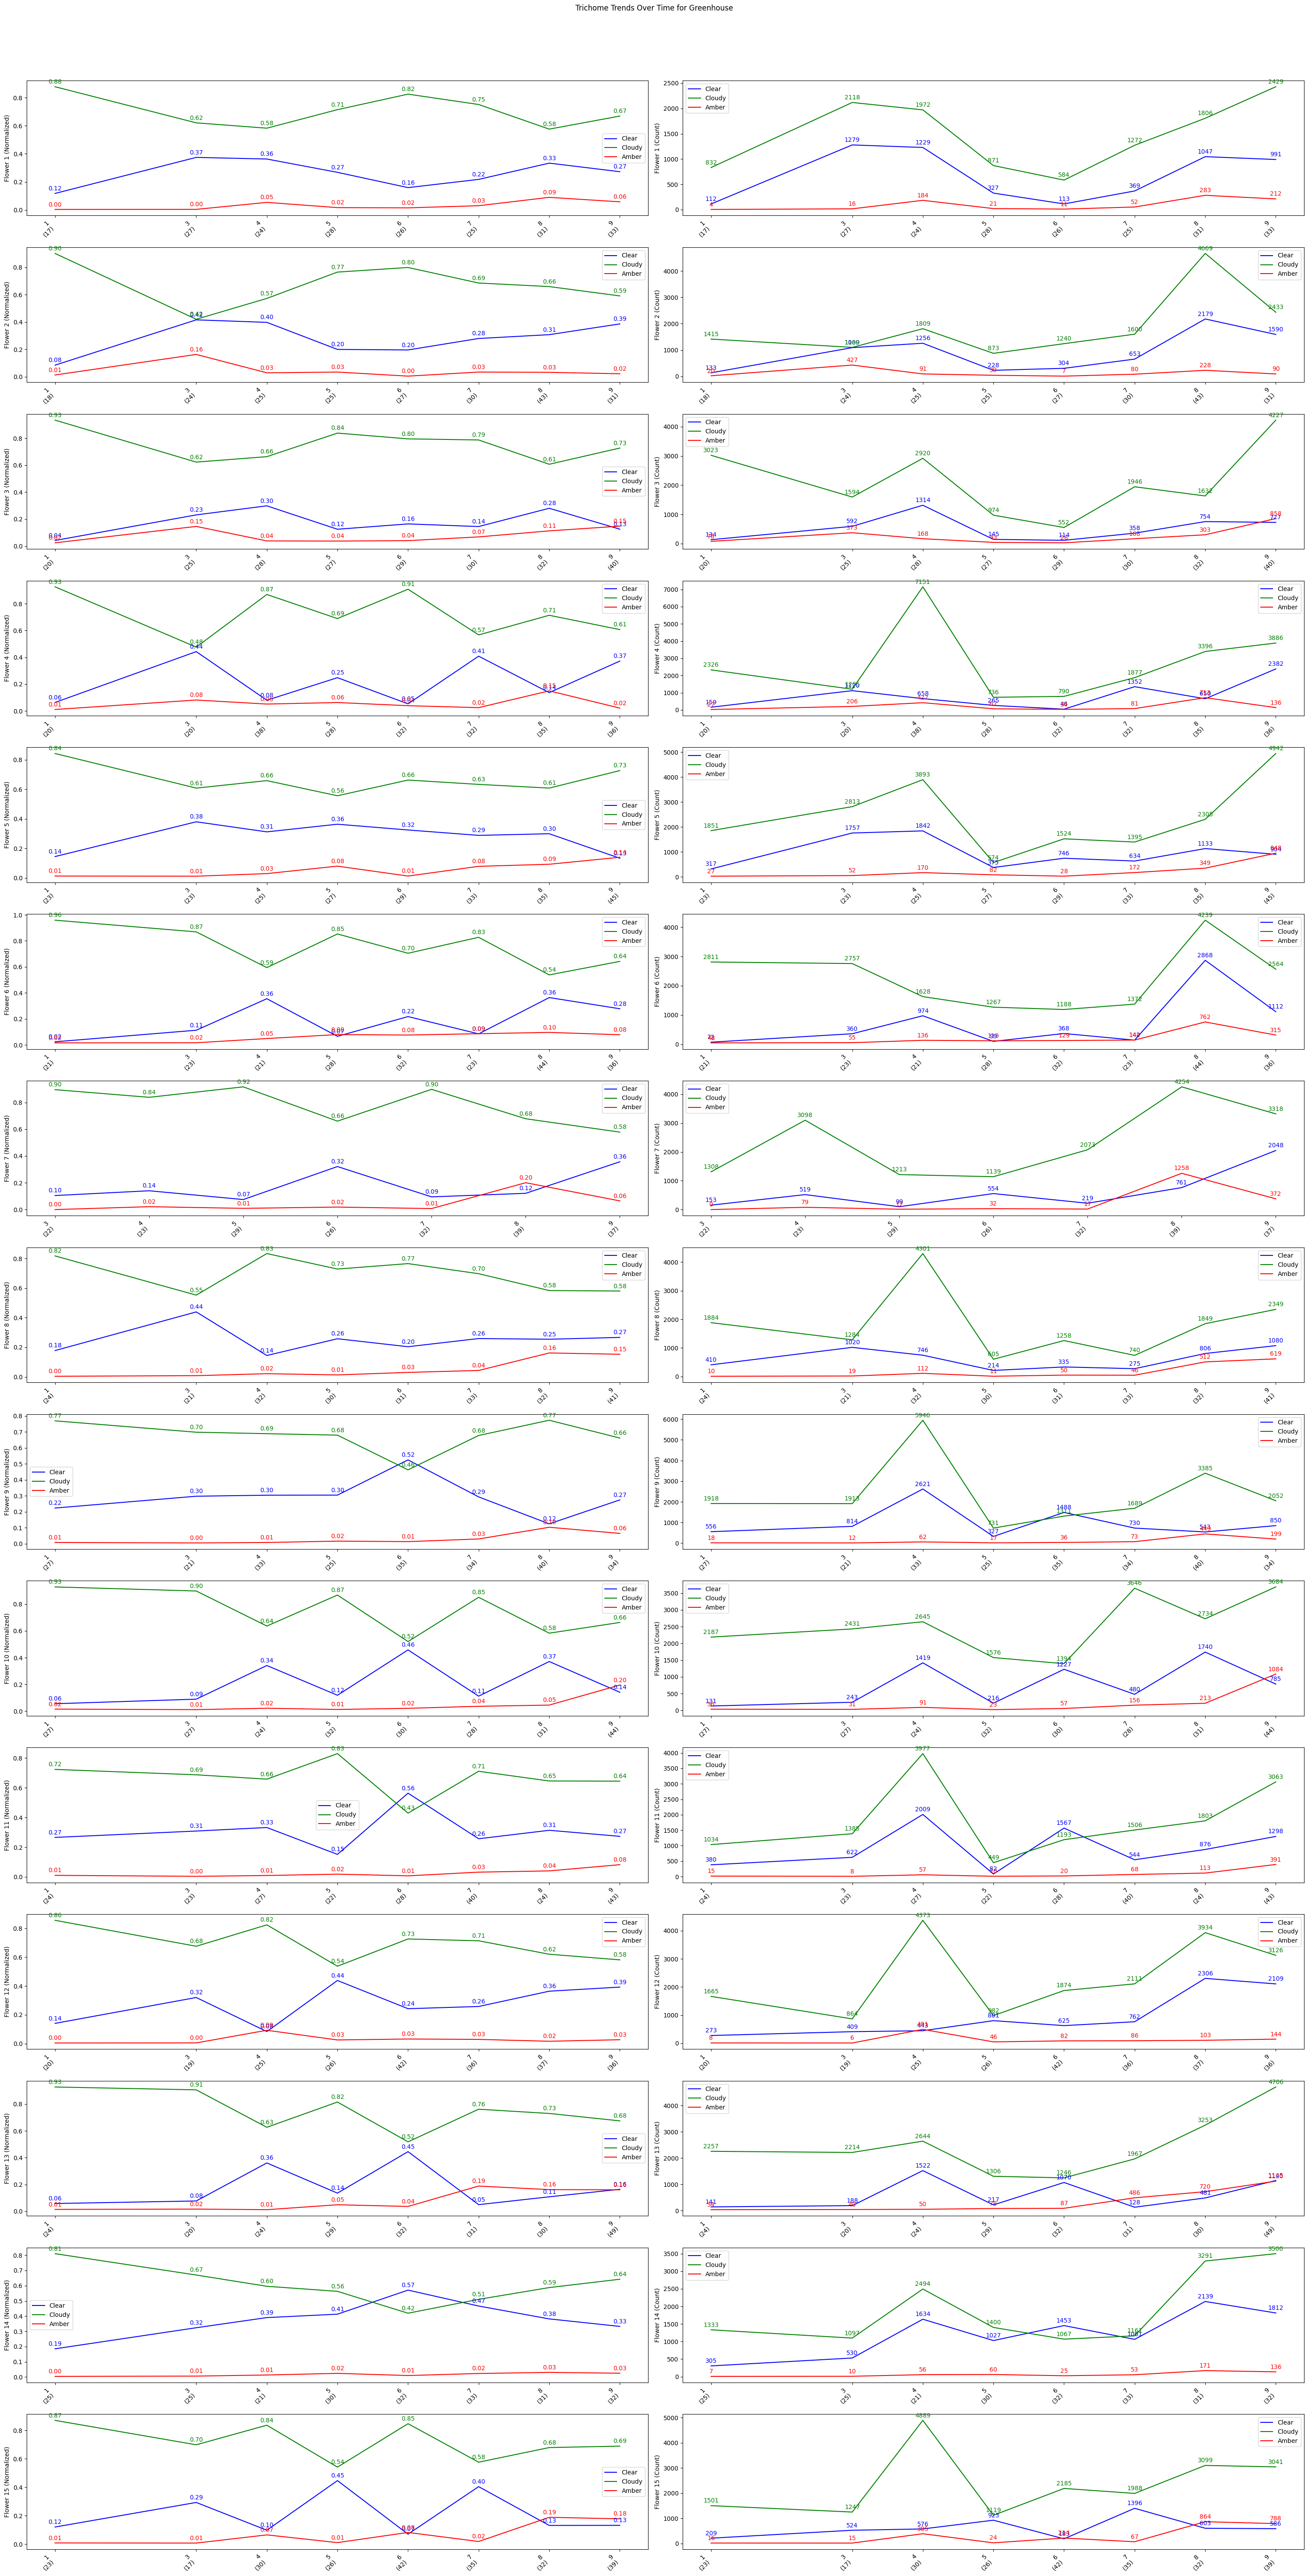

In [18]:
plot_combined_trends_subplots(df_greenhouse, 'Greenhouse')

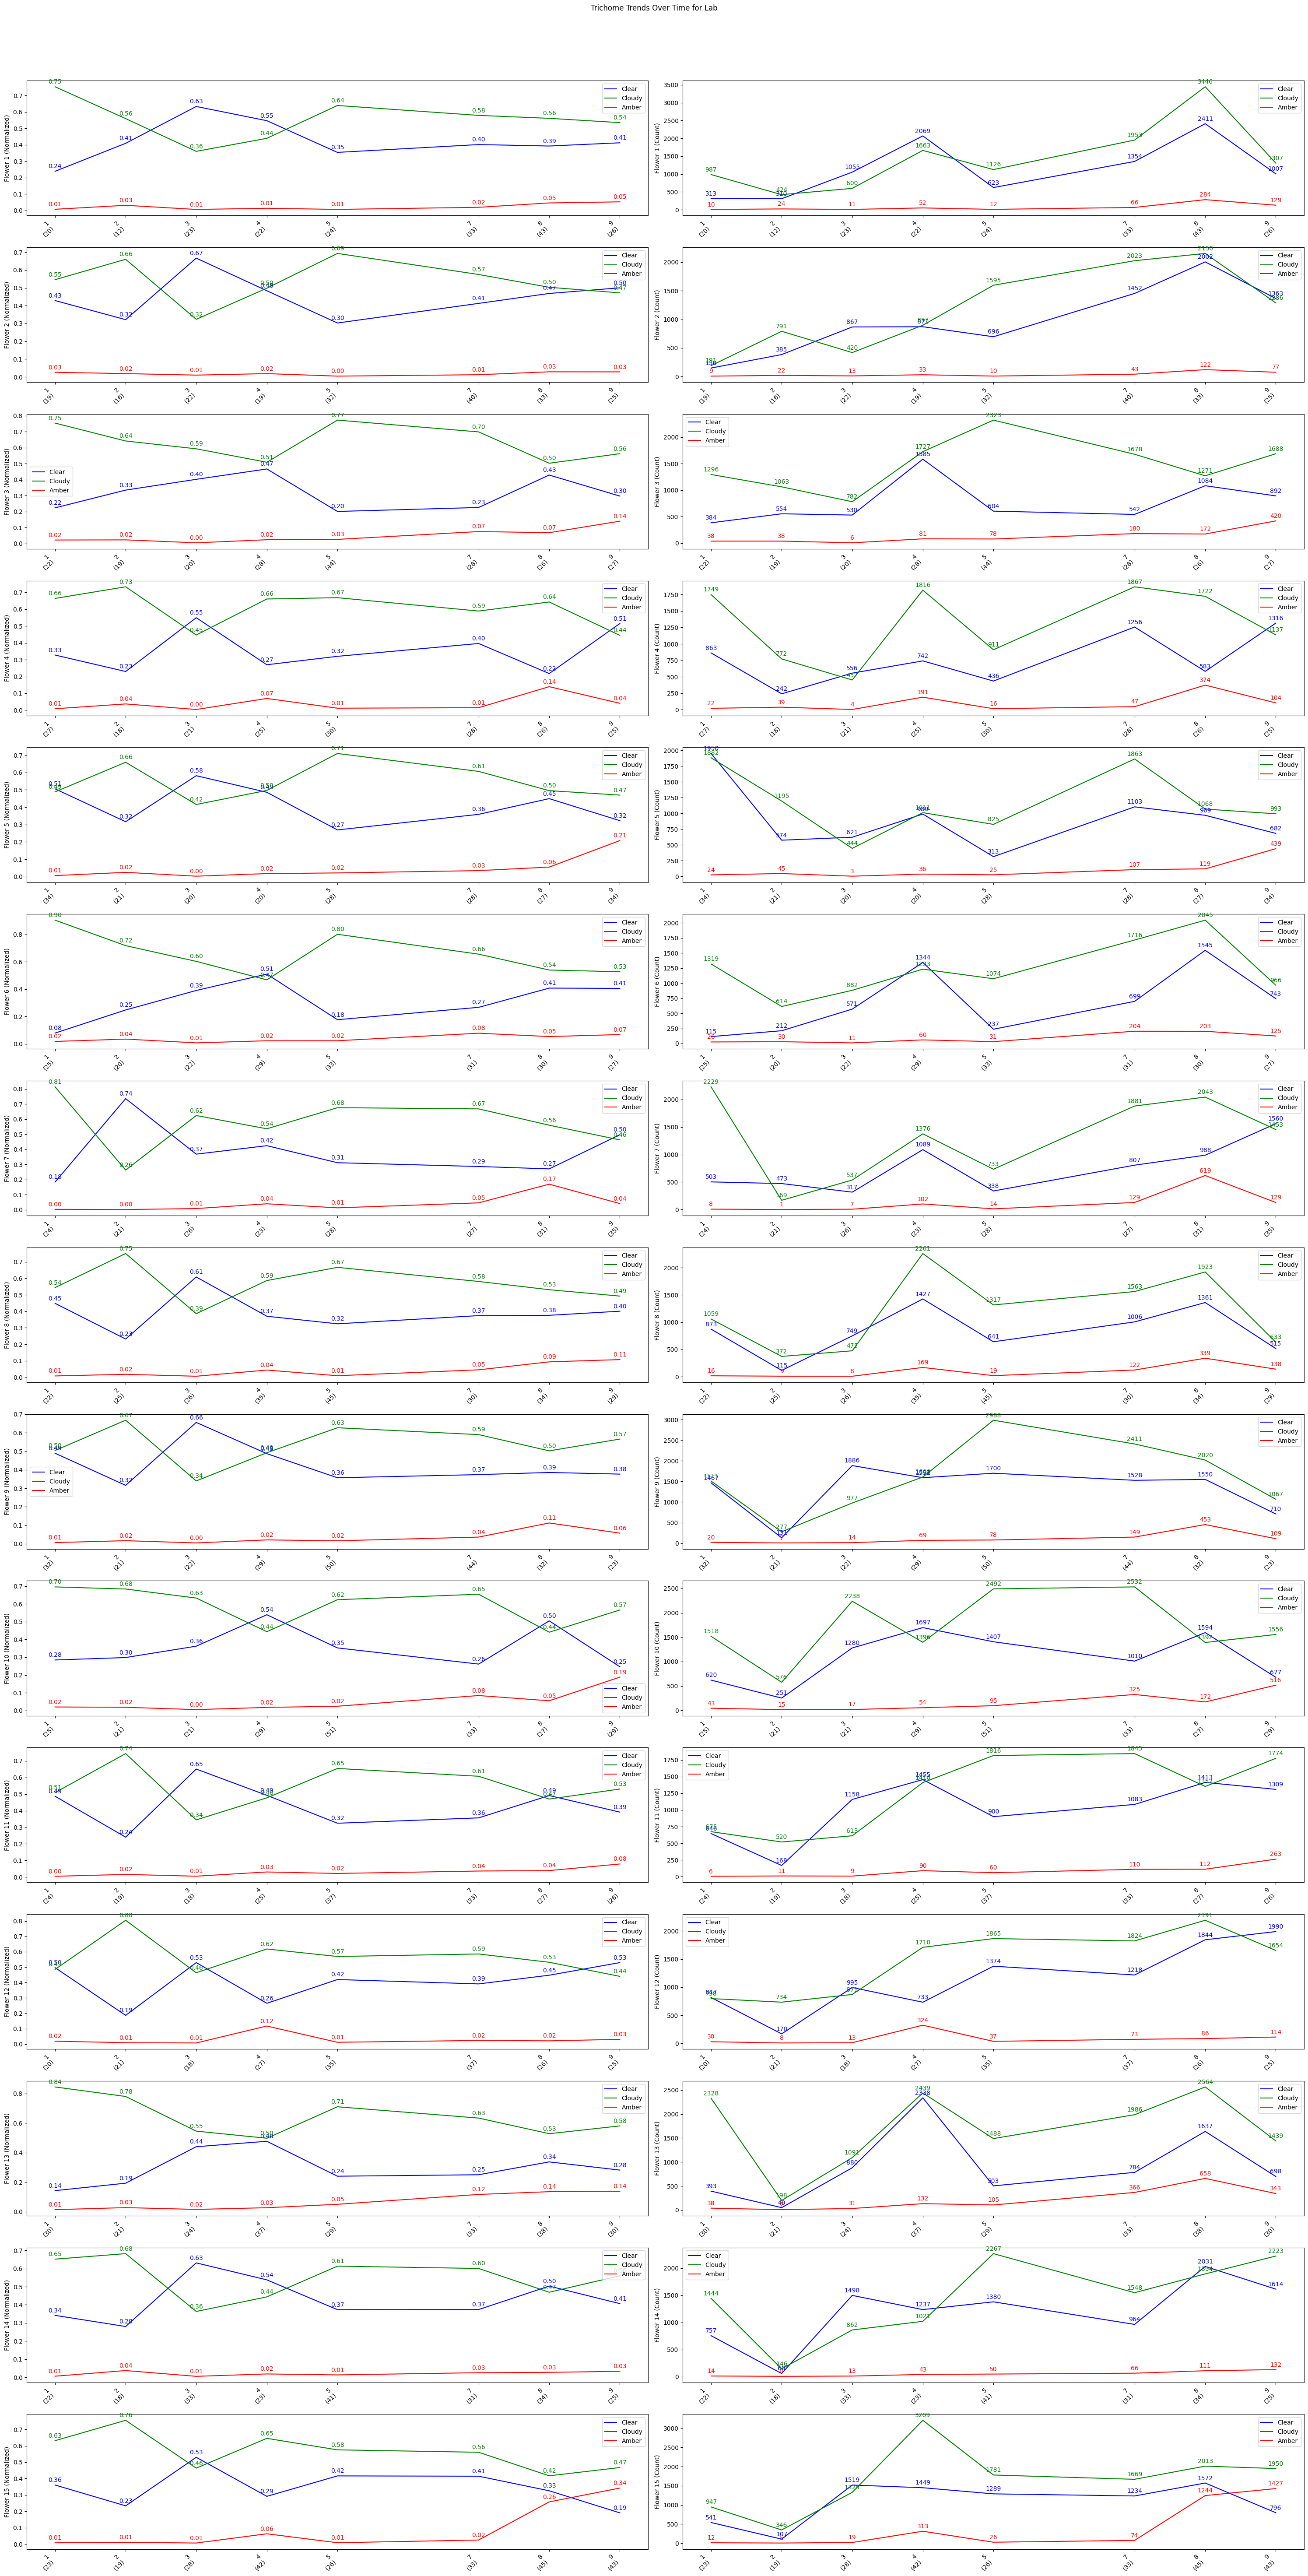

In [19]:
plot_combined_trends_subplots(df_lab, 'Lab')

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_trends_by_plant_type(df):
    # Ensure plant_type is treated as a category
    df['plant_type'] = df['plant_type'].astype(str)

    # Select only numeric columns for averaging
    numeric_cols = ['clear_normalized', 'cloudy_normalized', 'amber_normalized']

    plant_types = df['plant_type'].unique()
    num_types = len(plant_types)

    fig, axes = plt.subplots(num_types, 1, figsize=(15, num_types * 4), squeeze=False)

    for idx, plant_type in enumerate(plant_types):
        plant_data = df[df['plant_type'] == plant_type].copy()

        # Ensure numeric columns are correctly formatted
        plant_data[numeric_cols] = plant_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

        # Group by day_number and compute the mean of numeric columns
        avg_trends = plant_data.groupby('day_number')[numeric_cols].mean()

        days = avg_trends.index
        clear_trend = avg_trends['clear_normalized']
        cloudy_trend = avg_trends['cloudy_normalized']
        amber_trend = avg_trends['amber_normalized']

        ax = axes[idx, 0]
        ax.plot(days, clear_trend, label='Clear', color='blue', marker='o')
        ax.plot(days, cloudy_trend, label='Cloudy', color='green', marker='o')
        ax.plot(days, amber_trend, label='Amber', color='red', marker='o')

        # Add annotations
        for i, day in enumerate(days):
            ax.annotate(f'{clear_trend.iloc[i]:.2f}', (day, clear_trend.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax.annotate(f'{cloudy_trend.iloc[i]:.2f}', (day, cloudy_trend.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax.annotate(f'{amber_trend.iloc[i]:.2f}', (day, amber_trend.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

        ax.set_ylabel(f'Plant Type {plant_type}')
        ax.set_xlabel('Day Number')
        ax.legend()
        ax.set_xticks(days)
        ax.set_xticklabels(days, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time by Plant Type')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


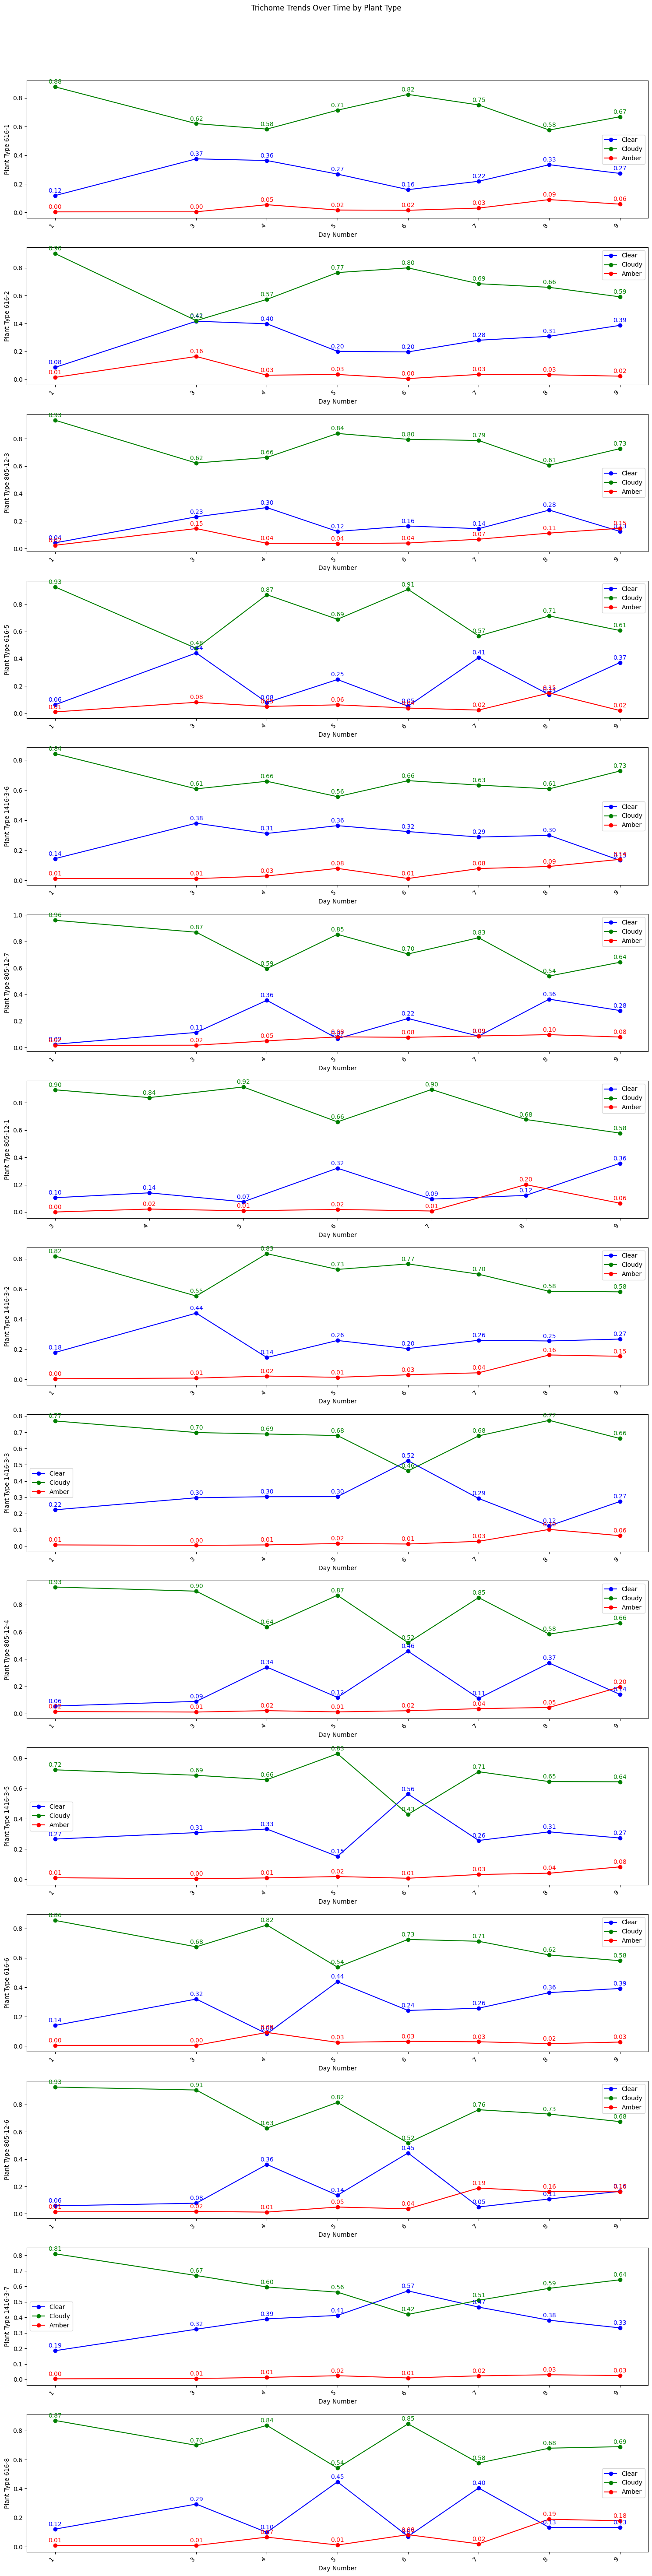

In [39]:
plot_trends_by_plant_type(df_greenhouse)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_trends_by_photographer(df):
    # Ensure photographer column is treated as a category
    df['photographer'] = df['photographer'].astype(str)

    # Select only numeric columns for averaging
    numeric_cols = ['clear_normalized', 'cloudy_normalized', 'amber_normalized']

    # Group by photographer and day_number, computing the mean values
    avg_trends = df.groupby(['day_number', 'photographer'])[numeric_cols].mean().reset_index()

    photographers = df['photographer'].unique()
    
    # Define colors for consistency
    colors = {"Etay": "blue", "Uriel": "green", "Unknown": "gray"}

    plt.figure(figsize=(12, 6))

    for photographer in photographers:
        if photographer == "Unknown":
            continue  # Skip "Unknown" if we don't want it in the plot

        subset = avg_trends[avg_trends['photographer'] == photographer]

        plt.plot(subset['day_number'], subset['clear_normalized'], label=f'Clear ({photographer})', color=colors[photographer], linestyle='dashed', marker='o')
        plt.plot(subset['day_number'], subset['cloudy_normalized'], label=f'Cloudy ({photographer})', color=colors[photographer], linestyle='solid', marker='o')
        plt.plot(subset['day_number'], subset['amber_normalized'], label=f'Amber ({photographer})', color=colors[photographer], linestyle='dotted', marker='o')

    plt.xlabel('Day Number')
    plt.ylabel('Normalized Trichome Ratios')
    plt.title('Trichome Trends by Photographer')
    plt.legend()
    plt.grid(True)
    plt.xticks(avg_trends['day_number'].unique(), rotation=45)
    
    plt.show()


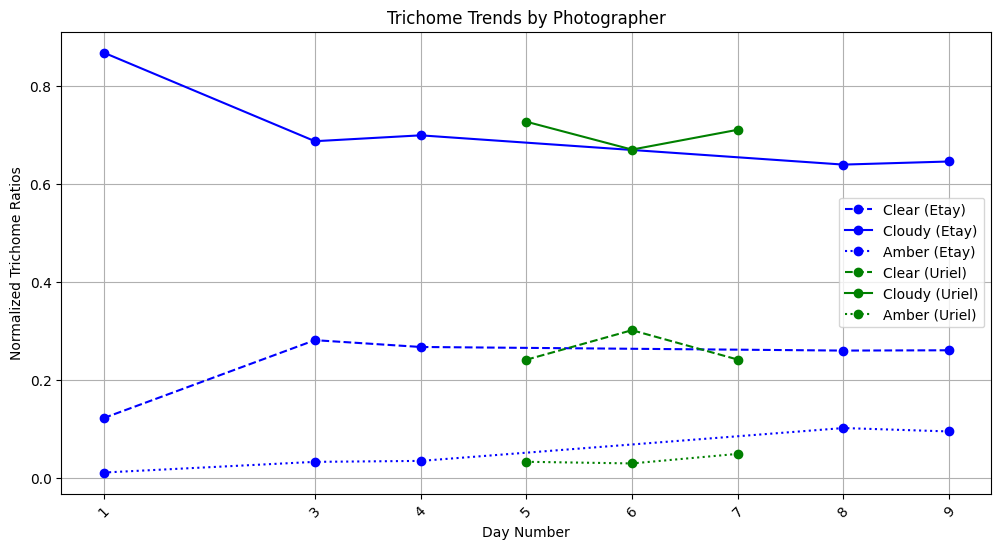

In [27]:
# Call the function
plot_trends_by_photographer(df_greenhouse)